 **Convolution for MNIST**

This notebook builds a proper network for 2D convolution.  It works with the MNIST dataset, which was the original classic dataset for classifying images.  The network will take a 28x28 grayscale image and classify it into one of 10 classes representing a digit.

The code is adapted from https://nextjournal.com/gkoehler/pytorch-mnist

Work through the cells below, running each cell in turn. In various places you will see the words "TO DO". Follow the instructions at these places and make predictions about what is going to happen or write code to complete the functions.

Contact me at udlbookmail@gmail.com if you find any mistakes or have any suggestions.


In [1]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import random

In [2]:
# Run this once to load the train and test data straight into a dataloader class
# that will provide the batches

# (It may complain that some files are missing because the files seem to have been
# reorganized on the underlying website, but it still seems to work). If everything is working
# properly, then the whole notebook should run to the end without further problems
# even before you make changes.
batch_size_train = 64
batch_size_test = 1000

# Change this directory to point towards an existing directory
myDir = '/Users/ruwen/Desktop/Example'

train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST(myDir, train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST(myDir, train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

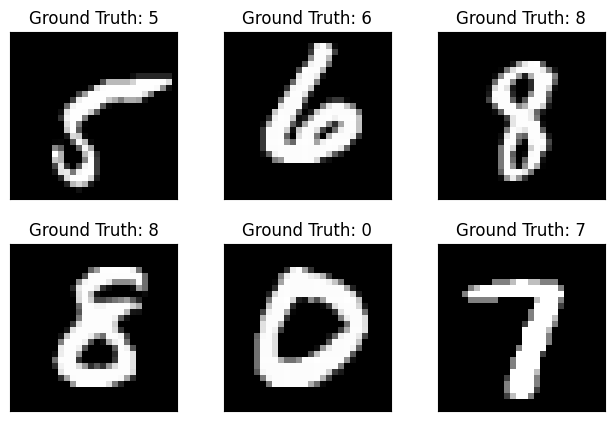

In [3]:
# Let's draw some of the training data
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
plt.show()

Define the network.  This is a more typical way to define a network than the sequential structure.  We define a class for the network, and define the parameters in the constructor.  Then we use a function called forward to actually run the network.  It's easy to see how you might use residual connections in this format.

In [4]:
from os import X_OK
# TODO Change this class to implement
# 1. A valid convolution with kernel size 5, 1 input channel and 10 output channels
# 2. A max pooling operation over a 2x2 area
# 3. A Relu
# 4. A valid convolution with kernel size 5, 10 input channels and 20 output channels
# 5. A 2D Dropout layer
# 6. A max pooling operation over a 2x2 area
# 7. A relu
# 8. A flattening operation
# 9. A fully connected layer mapping from (whatever dimensions we are at-- find out using .shape) to 50
# 10. A ReLU
# 11. A fully connected layer mapping from 50 to 10 dimensions
# 12. A softmax function.

# Replace this class which implements a minimal network (which still does okay)
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        
        # 1. A valid convolution with kernel size 5, 1 input channel, and 10 output channels
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5) # 
        
        # 2. Max pooling over a 2x2 area
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # 3. ReLU layer for conv1
        self.relu1 = nn.ReLU()
        
        # 4. A valid convolution with kernel size 5, 10 input channels, and 20 output channels
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        
        # 5. A 2D Dropout layer
        self.drop = nn.Dropout2d()
        
        # 6. Max pooling over a 2x2 area
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # 7. ReLU layer for conv2
        self.relu2 = nn.ReLU()
        
        # 8-9. Fully connected layer
        # After conv2 and pooling, the size is 4x4 for each of the 20 channels.
        self.fc1 = nn.Linear(20 * 4 * 4, 50)  # Adjust dimensions based on the output of pooling and conv layers
        
        # 10. ReLU after fully connected layer
        self.relu_fc = nn.ReLU()
        
        # 11. Fully connected layer mapping from 50 to 10
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        # Apply the first conv layer, ReLU, and max pooling
        x = self.relu1(self.pool1(self.conv1(x)))  # Output: 12x12
        
        # Apply the second conv layer, 2D dropout, ReLU, and max pooling
        x = self.relu2(self.pool2(self.drop(self.conv2(x))))  # Output: 4x4
        
        # 8. Flattening operation
        x = x.flatten(1)  # Flatten the tensor for fully connected layers
        
        # 9-10. Fully connected layer with ReLU
        x = self.relu_fc(self.fc1(x))
        
        # 11. Fully connected layer mapping to 10 outputs
        x = self.fc2(x)
        
        # 12. Softmax function for output layer (optional in classification tasks)
        x = F.softmax(x, dim=1)  # Softmax applied to the output layer for classification
        
        return x
    
    

In [5]:
# He initialization of weights
def weights_init(layer_in):
  if isinstance(layer_in, nn.Linear):
    nn.init.kaiming_uniform_(layer_in.weight)
    layer_in.bias.data.fill_(0.0)

In [6]:
# Create network
model = Net()
# Initialize model weights
model.apply(weights_init)
# Define optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

In [7]:
# Main training routine
def train(epoch):
  model.train()
  # Get each
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = model(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    # Store results
    if batch_idx % 10 == 0:
      print('Train Epoch: {} [{}/{}]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset), loss.item()))

In [8]:
# Run on test data
def test():
  model.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = model(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [9]:
# Get initial performance
test()
# Train for three epochs
n_epochs = 3
for epoch in range(1, n_epochs + 1):
  train(epoch)
  test()

/opt/anaconda3/lib/python3.11/site-packages/torch/nn/_reduction.py:51: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: -0.1010, Accuracy: 1360/10000 (14%)

Train Epoch: 1 [0/60000]	Loss: -0.100646
Train Epoch: 1 [640/60000]	Loss: -0.119785
Train Epoch: 1 [1280/60000]	Loss: -0.111109
Train Epoch: 1 [1920/60000]	Loss: -0.107776
Train Epoch: 1 [2560/60000]	Loss: -0.111365
Train Epoch: 1 [3200/60000]	Loss: -0.115207
Train Epoch: 1 [3840/60000]	Loss: -0.135661
Train Epoch: 1 [4480/60000]	Loss: -0.121825
Train Epoch: 1 [5120/60000]	Loss: -0.131277
Train Epoch: 1 [5760/60000]	Loss: -0.162774
Train Epoch: 1 [6400/60000]	Loss: -0.141049
Train Epoch: 1 [7040/60000]	Loss: -0.165501
Train Epoch: 1 [7680/60000]	Loss: -0.248938
Train Epoch: 1 [8320/60000]	Loss: -0.168489
Train Epoch: 1 [8960/60000]	Loss: -0.177175
Train Epoch: 1 [9600/60000]	Loss: -0.234584
Train Epoch: 1 [10240/60000]	Loss: -0.311582
Train Epoch: 1 [10880/60000]	Loss: -0.288897
Train Epoch: 1 [11520/60000]	Loss: -0.277005
Train Epoch: 1 [12160/60000]	Loss: -0.268451
Train Epoch: 1 [12800/60000]	Loss: -0.330323
Train Epoch: 1 [

Train Epoch: 2 [56320/60000]	Loss: -0.687211
Train Epoch: 2 [56960/60000]	Loss: -0.686555
Train Epoch: 2 [57600/60000]	Loss: -0.548929
Train Epoch: 2 [58240/60000]	Loss: -0.691184
Train Epoch: 2 [58880/60000]	Loss: -0.678671
Train Epoch: 2 [59520/60000]	Loss: -0.663223

Test set: Avg. loss: -0.6801, Accuracy: 6824/10000 (68%)

Train Epoch: 3 [0/60000]	Loss: -0.717836
Train Epoch: 3 [640/60000]	Loss: -0.713817
Train Epoch: 3 [1280/60000]	Loss: -0.598107
Train Epoch: 3 [1920/60000]	Loss: -0.640037
Train Epoch: 3 [2560/60000]	Loss: -0.591735
Train Epoch: 3 [3200/60000]	Loss: -0.713109
Train Epoch: 3 [3840/60000]	Loss: -0.729453
Train Epoch: 3 [4480/60000]	Loss: -0.714466
Train Epoch: 3 [5120/60000]	Loss: -0.650810
Train Epoch: 3 [5760/60000]	Loss: -0.637222
Train Epoch: 3 [6400/60000]	Loss: -0.683439
Train Epoch: 3 [7040/60000]	Loss: -0.735647
Train Epoch: 3 [7680/60000]	Loss: -0.717359
Train Epoch: 3 [8320/60000]	Loss: -0.592880
Train Epoch: 3 [8960/60000]	Loss: -0.718376
Train Epoch: 3 

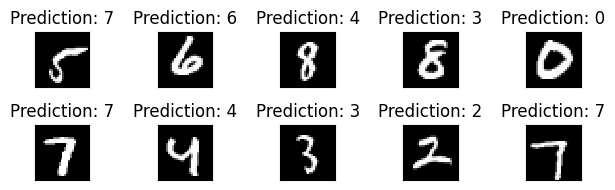

In [10]:
# Run network on data we got before and show predictions
output = model(example_data)

fig = plt.figure()
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Prediction: {}".format(
    output.data.max(1, keepdim=True)[1][i].item()))
  plt.xticks([])
  plt.yticks([])
plt.show()